In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

#from bqplot import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls ../data/processed/scrape/4*

../data/processed/scrape/4-4:
day-agg.csv
day-lang-agg.csv
jan-archive.tar.bzip2

../data/processed/scrape/4-5:
all-gps.csv


In [3]:
lang_f = '../data/processed/scrape/4-4/day-lang-agg.csv'
lang_df = pd.read_csv(lang_f)

lang_df.head()

,day,language,count
0,2016-12-22,ar,4232
1,2016-12-22,ca,5
2,2016-12-22,cs,1
3,2016-12-22,de,90
4,2016-12-22,el,3


In [4]:
# sums of counts
language_total_count = lang_df[['language', 'count']].groupby('language').agg('sum')

# ...Sorted in order
language_total_count = language_total_count.reset_index().sort_values('count', ascending=False)

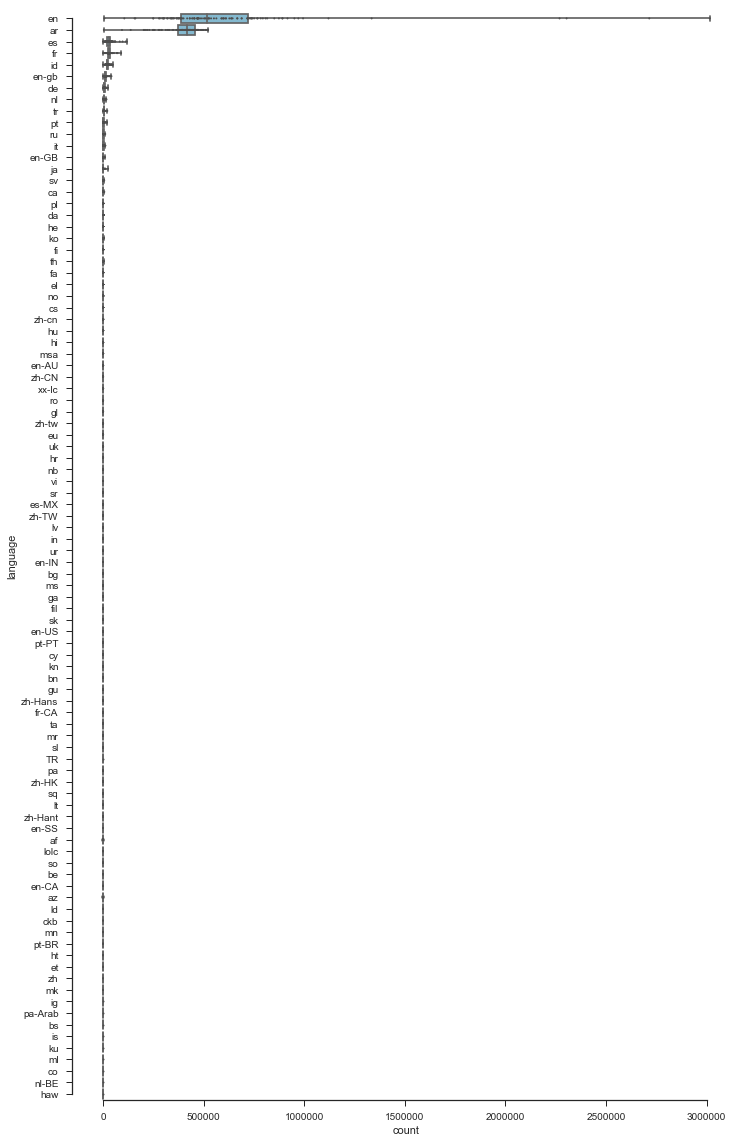

In [9]:
plt.figure(figsize=(12, 20))

ax = sns.boxplot(x='count', y='language', data=lang_df,
                 order=language_total_count.language.tolist(),
                whis=np.inf, color="c")

sns.stripplot(x='count', y='language', data=lang_df,
              order=language_total_count.language.tolist(),
             color='.3', linewidth=0, size=2)

#ax.set_xscale('log')
sns.despine(trim=True)